In [19]:
#https://www.codementor.io/ferrorodolfo/sentiment-analysis-on-trump-s-tweets-using-python-pltbvb4xr
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'dKnNHGlG1iFA1sJBBwwFO5Udf'
CONSUMER_SECRET = '0axA3cZfMOGqezQbBFu9aGBmBqPvo3SD2j3IjaeOUiFZihjm31'

# Access:
ACCESS_TOKEN  = '387635108-t2o8PyS5tIaplHYfuQNMEDzNiJ3WjkBHeS9v0aXH'
ACCESS_SECRET = 'TZZEmCsvIKp5s0WYN9P9PXlF5a4lQXRKayLtAnBR9za2L'


In [21]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [22]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Loreal", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 197.

5 recent tweets:

RT @LOrealUSA: #DidYouKnow that women account for half of the @Loreal Group's top positions worldwide? 🙌 Our commitment to gender equality…

RT @LOrealUSA: After a life-long career with the largest beauty company in the world, it's safe to say that Jean-Paul Agon, @Loreal Chairma…

Discover 🔎 the immersive tunnel of the #exhibition #DansMaPeau at @Musee_Homme and be fascinated by real multi-imag… https://t.co/A0jE6IJxuq

RT @UNESCO: Congratulations to this year’s winners of the @Loreal - @UNESCO #ForWomenInScience awards and 15 International Rising Talents!…

RT @AudreyPulvar: Bravo à @AlexandraPalt et à @Loreal pour cette très belle soirée des prix #WomenInscience, avec des lauréates toujours au…



In [23]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @LOrealUSA: #DidYouKnow that women account ...
1,RT @LOrealUSA: After a life-long career with t...
2,Discover 🔎 the immersive tunnel of the #exhibi...
3,RT @UNESCO: Congratulations to this year’s win...
4,RT @AudreyPulvar: Bravo à @AlexandraPalt et à ...
5,"Congratulations to @ilyapharma, the winner of ..."
6,La quête de la #beauté est le moteur d'une cro...
7,The quest for #beauty drives a steady growth f...
8,Immergez-vous dans l'univers de la #BeautyTech...
9,Step onboard the new #BeautyTech world with ou...


In [24]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [25]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1108263115051945985
2019-03-20 07:04:51
Sprinklr
0
5
None
None
{'hashtags': [{'text': 'DidYouKnow', 'indices': [15, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'LOrealUSA', 'name': "L'Oréal USA", 'id': 58602756, 'id_str': '58602756', 'indices': [3, 13]}, {'screen_name': 'Loreal', 'name': "L'Oréal Group", 'id': 37890617, 'id_str': '37890617', 'indices': [62, 69]}], 'urls': []}


In [26]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [27]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @LOrealUSA: #DidYouKnow that women account ...,139,1108263115051945985,2019-03-20 07:04:51,Sprinklr,0,5
1,RT @LOrealUSA: After a life-long career with t...,140,1108059715135852546,2019-03-19 17:36:37,Sprinklr,0,2
2,Discover 🔎 the immersive tunnel of the #exhibi...,140,1107973018108788736,2019-03-19 11:52:07,Sprinklr,16,6
3,RT @UNESCO: Congratulations to this year’s win...,139,1106902882295709697,2019-03-16 12:59:47,Sprinklr,0,56
4,RT @AudreyPulvar: Bravo à @AlexandraPalt et à ...,140,1106842539980713984,2019-03-16 09:00:00,Sprinklr,0,6
5,"Congratulations to @ilyapharma, the winner of ...",139,1106617566708097024,2019-03-15 18:06:02,Twitter for iPhone,21,7
6,La quête de la #beauté est le moteur d'une cro...,140,1106590549098811392,2019-03-15 16:18:41,Sprinklr,3,1
7,The quest for #beauty drives a steady growth f...,140,1106590307070763009,2019-03-15 16:17:43,Sprinklr,1,1
8,Immergez-vous dans l'univers de la #BeautyTech...,140,1106589802592378882,2019-03-15 16:15:43,Sprinklr,6,1
9,Step onboard the new #BeautyTech world with ou...,137,1106589529400586240,2019-03-15 16:14:37,Sprinklr,3,0


In [28]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 137.73096446700507


In [29]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Nous sommes heureux d'annoncer que dans le cadre de notre programme social mondial L'Oréal Share &amp; Care, L'Oréal pr… https://t.co/pC7Y6M9OCz
Number of likes: 72
144 characters.

The tweet with more retweets is: 
RT @4womeninscience: 👩‍🔬 ‍On this International Day of Women and Girls in #Science, @LOreal and @UNESCO are proud to announce the names of…
Number of retweets: 106
139 characters.



In [30]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

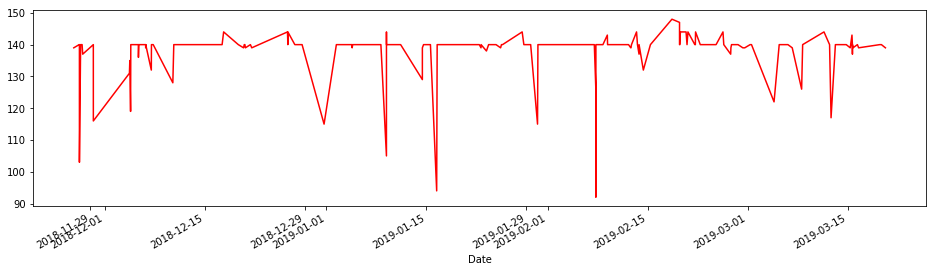

In [31]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

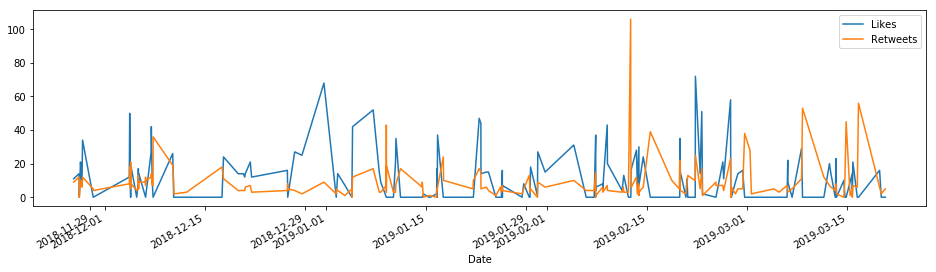

In [32]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [33]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Sprinklr
* Twitter for iPhone
* Twitter Web Client


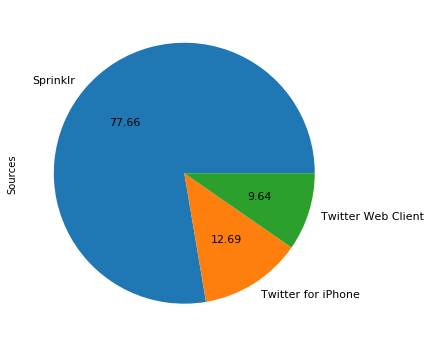

In [34]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [35]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [36]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @LOrealUSA: #DidYouKnow that women account ...,139,1108263115051945985,2019-03-20 07:04:51,Sprinklr,0,5,1
1,RT @LOrealUSA: After a life-long career with t...,140,1108059715135852546,2019-03-19 17:36:37,Sprinklr,0,2,1
2,Discover 🔎 the immersive tunnel of the #exhibi...,140,1107973018108788736,2019-03-19 11:52:07,Sprinklr,16,6,1
3,RT @UNESCO: Congratulations to this year’s win...,139,1106902882295709697,2019-03-16 12:59:47,Sprinklr,0,56,0
4,RT @AudreyPulvar: Bravo à @AlexandraPalt et à ...,140,1106842539980713984,2019-03-16 09:00:00,Sprinklr,0,6,0
5,"Congratulations to @ilyapharma, the winner of ...",139,1106617566708097024,2019-03-15 18:06:02,Twitter for iPhone,21,7,0
6,La quête de la #beauté est le moteur d'une cro...,140,1106590549098811392,2019-03-15 16:18:41,Sprinklr,3,1,0
7,The quest for #beauty drives a steady growth f...,140,1106590307070763009,2019-03-15 16:17:43,Sprinklr,1,1,1
8,Immergez-vous dans l'univers de la #BeautyTech...,140,1106589802592378882,2019-03-15 16:15:43,Sprinklr,6,1,0
9,Step onboard the new #BeautyTech world with ou...,137,1106589529400586240,2019-03-15 16:14:37,Sprinklr,3,0,1


In [37]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [38]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 46.192893401015226%
Percentage of neutral tweets: 50.253807106598984%
Percentage de negative tweets: 3.553299492385787%
